review data til videre brug

In [17]:
import numpy as np 
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import string

In [20]:
import pandas as pd

# Paths to your training data files
amazon_fashion_path = '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/AMAZON_FASHION.json'
all_beauty_path = '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/All_Beauty.json'
clothing_shoes_jewelry_path = '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Clothing_Shoes_and_Jewelry.json'

#'/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Luxury_Beauty.json'
#'/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Clothing_Shoes_and_Jewelry.json'

#test_data_path = '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Luxury_Beauty.json'

# Number of rows to read from each file
n_rows = 40000  # for example, read only the first 1000 rows

# Load a subset of each training dataset
amazon_fashion = pd.read_json(amazon_fashion_path, lines=True, nrows=n_rows)
all_beauty = pd.read_json(all_beauty_path, lines=True, nrows=n_rows)
clothing_shoes_jewelry = pd.read_json(clothing_shoes_jewelry_path, lines=True, nrows=n_rows)

# Concatenate the datasets
training_data = pd.concat([amazon_fashion, all_beauty, clothing_shoes_jewelry])

# Display the first few rows of the training data
print("First few rows of the training data:")
print(training_data.head())




First few rows of the training data:
   overall  verified   reviewTime      reviewerID        asin  reviewerName  \
0        5      True  10 20, 2014  A1D4G1SNUZWQOT  7106116521         Tracy   
1        2      True  09 28, 2014  A3DDWDH9PX2YX2  7106116521     Sonja Lau   
2        4     False  08 25, 2014  A2MWC41EW7XL15  7106116521      Kathleen   
3        2      True  08 24, 2014  A2UH2QQ275NV45  7106116521   Jodi Stoner   
4        3     False  07 27, 2014   A89F3LQADZBS5  7106116521  Alexander D.   

                                          reviewText  \
0                             Exactly what I needed.   
1  I agree with the other review, the opening is ...   
2  Love these... I am going to order another pack...   
3                                too tiny an opening   
4                                               Okay   

                                             summary  unixReviewTime vote  \
0                             perfect replacements!!      1413763200  NaN 

statistisc på overall

In [10]:
# Assuming you have already loaded and concatenated your training data as 'training_data'

# Display descriptive statistics for the 'overall' column
overall_stats = training_data['overall'].describe()
print("Descriptive statistics for 'overall' column:")
print(overall_stats)


Descriptive statistics for 'overall' column:
count    120000.000000
mean          4.272325
std           1.196318
min           1.000000
25%           4.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: overall, dtype: float64


er der missing values på review og overall

In [11]:
# Assuming you have already loaded and concatenated your training data as 'training_data'

# Check for missing values and calculate the proportion of missing values for each column
missing_values = training_data.isnull().mean()
print("Proportion of missing values in each column:")
print(missing_values)


Proportion of missing values in each column:
overall           0.000000
verified          0.000000
reviewTime        0.000000
reviewerID        0.000000
asin              0.000000
reviewerName      0.000067
reviewText        0.001083
summary           0.000375
unixReviewTime    0.000000
vote              0.905625
style             0.303800
image             0.988400
dtype: float64


tjekke rating(overall) distributionen

In [12]:
# Assuming you have already loaded and concatenated your training data as 'training_data'

# Calculate and display value counts as a proportion for the 'Rating' column
rating_counts_normalized = training_data['overall'].value_counts(normalize=True)
print("Value counts as a proportion for the 'Rating' column:")
print(rating_counts_normalized)


Value counts as a proportion for the 'Rating' column:
overall
5    0.642083
4    0.168475
3    0.075550
1    0.066425
2    0.047467
Name: proportion, dtype: float64


se på ord igen 

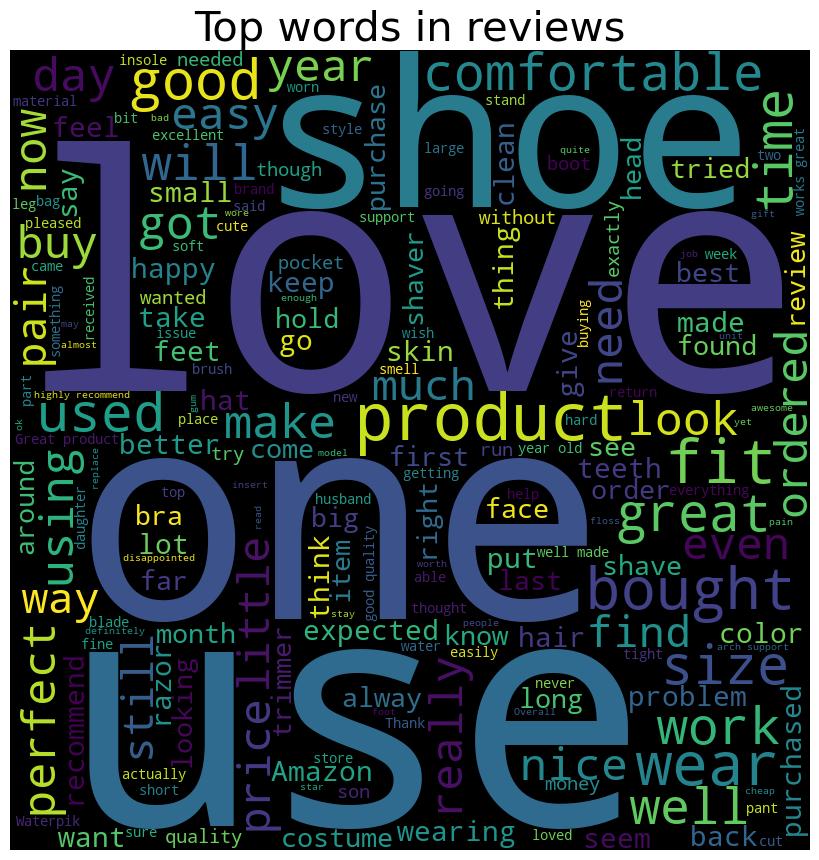

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordCloud_generator(data, column_name, title=None):
    # Generate the word cloud from the specified column
    wordcloud = WordCloud(width=800, height=800,
                          background_color='black',
                          min_font_size=10
                         ).generate(" ".join(data[column_name].astype(str)))  # Ensure the column is converted to string
    
    # Create and display the word cloud plot
    plt.figure(figsize=(8, 8), facecolor=None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(title, fontsize=30)
    plt.show()

# Example usage:
# Replace 'training_data' with your DataFrame and 'Reviewtext' with the name of your text column
wordCloud_generator(training_data, column_name="reviewText", title="Top words in reviews")


unique words

In [16]:
def count_unique_words(data, column_name):
    # Concatenate all text in the specified column into a single string
    text = " ".join(data[column_name].astype(str))

    # Tokenize the text into words
    words = text.split()

    # Create a set of unique words
    unique_words = set(words)

    # Count the number of unique words
    num_unique_words = len(unique_words)

    return num_unique_words

# Example usage:
# Replace 'training_data' with your DataFrame and 'Reviewtext' with the name of your text column
num_unique_words = count_unique_words(training_data, column_name="reviewText")
print("Number of unique words:", num_unique_words)



Number of unique words: 117030


review længde på charakters 

In [21]:
# Calculate the maximum length of reviewText
max_length = training_data['reviewText'].str.len().max()

# Calculate the minimum length of reviewText
min_length = training_data['reviewText'].str.len().min()

# Calculate the average length of reviewText
avg_length = training_data['reviewText'].str.len().mean()

print(f"Maximum Length: {max_length}")
print(f"Minimum Length: {min_length}")
print(f"Average Length: {avg_length}")


Maximum Length: 13741.0
Minimum Length: 1.0
Average Length: 209.74197314652656


number of words 

Maximum Length in Words: 2443.0
Minimum Length in Words: 1.0
Average Length in Words: 39.499891585355684


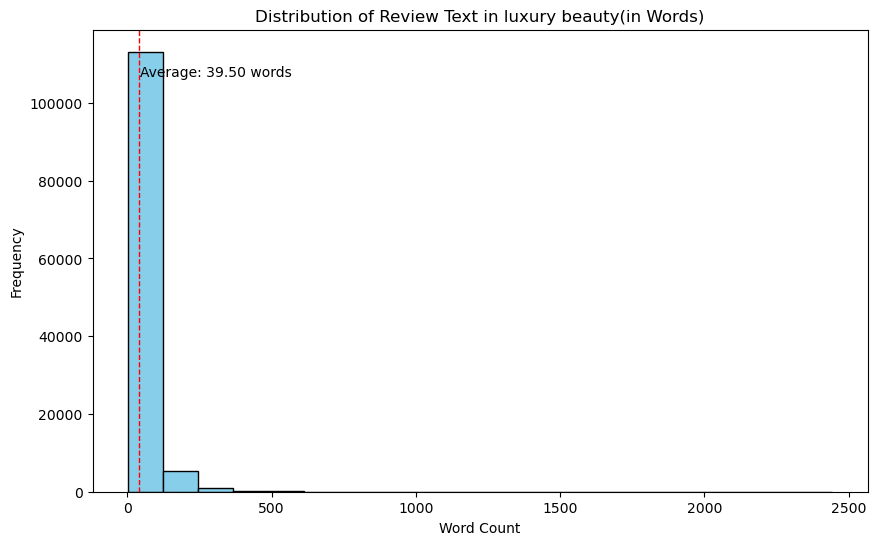

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'training_data' is a pandas DataFrame with a column 'reviewText'
# Replace with your actual DataFrame
# Sample data for demonstration:
# training_data = pd.DataFrame({'reviewText': ['Your', 'sample', 'text', 'goes', 'here']})

# Calculate the word count for each review
word_counts = training_data['reviewText'].str.split().str.len()

# Calculate the maximum, minimum, and average lengths in words
max_length_words = word_counts.max()
min_length_words = word_counts.min()
avg_length_words = word_counts.mean()

# Output the results
print(f"Maximum Length in Words: {max_length_words}")
print(f"Minimum Length in Words: {min_length_words}")
print(f"Average Length in Words: {avg_length_words}")

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Review Text in luxury beauty(in Words)")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.axvline(avg_length_words, color='red', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(avg_length_words*1.1, max_ylim*0.9, f'Average: {avg_length_words:.2f} words')
plt.show()


key metrics vocab_size

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/patrickbendorffschwebel/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


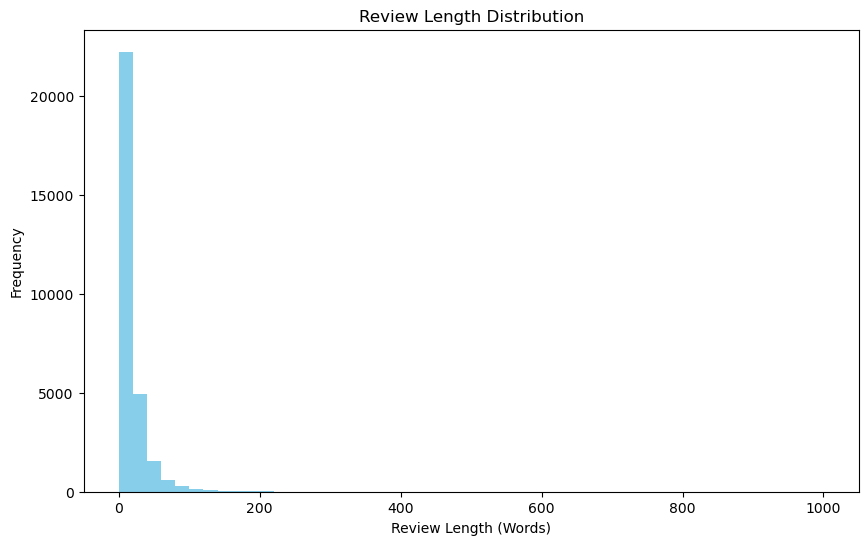

Evaluating model with embedding dimension: 50


2024-01-28 11:41:02.023697: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


NameError: name 'y_train' is not defined

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re

# Download required resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Set up stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define text preprocessing function
def preprocess_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
        tokens = word_tokenize(text)
        lemmatized_text = ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stop_words])
        return lemmatized_text
    else:
        return ""

# Paths to your training data files
amazon_fashion_path = 'path_to/AMAZON_FASHION.json'
all_beauty_path = 'path_to/All_Beauty.json'
clothing_shoes_jewelry_path = 'path_to/Clothing_Shoes_and_Jewelry.json'

# Load a subset of each training dataset
n_rows = 10000
amazon_fashion = pd.read_json(amazon_fashion_path, lines=True, nrows=n_rows)
all_beauty = pd.read_json(all_beauty_path, lines=True, nrows=n_rows)
clothing_shoes_jewelry = pd.read_json(clothing_shoes_jewelry_path, lines=True, nrows=n_rows)

# Concatenate the datasets
training_data = pd.concat([amazon_fashion, all_beauty, clothing_shoes_jewelry])

# Apply preprocessing to each review
training_data['processed_reviewText'] = training_data['reviewText'].apply(preprocess_text)

# Remove rows where 'processed_reviewText' is an empty string
training_data = training_data[training_data['processed_reviewText'] != ""]

# Calculate review lengths
training_data['review_length'] = training_data['processed_reviewText'].apply(lambda x: len(x.split()))

# Plot a histogram of review lengths
plt.figure(figsize=(10, 6))
plt.hist(training_data['review_length'], bins=50, color='skyblue', range=(0, 1000))
plt.title('Review Length Distribution')
plt.xlabel('Review Length (Words)')
plt.ylabel('Frequency')
plt.show()

# Determine max_length based on percentile
max_length = int(np.percentile(training_data['review_length'], 95))

# Tokenize the processed text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(training_data['processed_reviewText'])
vocab_size = len(tokenizer.word_index) + 1

# Convert texts to sequences and pad them
sequences = tokenizer.texts_to_sequences(training_data['processed_reviewText'])
padded_sequences = pad_sequences(sequences, maxlen=max_length)

# Define hyperparameters for embedding dimension evaluation
embedding_dims = [50, 100, 200, 300]
lstm_units_options = [64, 128]
batch_size_options = [32, 64]
learning_rate_options = [0.001, 0.0001]

# Cross-validation setup
kf = KFold(n_splits=3)
best_score = 0
best_embedding_dim = 0

# Iterate over different embedding dimensions
for dim in embedding_dims:
    print(f"Evaluating model with embedding dimension: {dim}")
    for lstm_units in lstm_units_options:
        for batch_size in batch_size_options:
            for learning_rate in learning_rate_options:
                scores = []
                for train_index, test_index in kf.split(padded_sequences):
                    # Split data
                    X_train, X_val = padded_sequences[train_index], padded_sequences[test_index]
                    # Assume y_train and y_val are already defined

                    # Create and fit the model with current embedding_dim
                    model = create_model(lstm_units, learning_rate, dim, max_length, vocab_size)
                    model.fit(X_train, y_train, epochs=10, batch_size=batch_size, validation_data=(X_val, y_val), verbose=0)
                    loss, accuracy = model.evaluate(X_val, y_val, verbose=0)
                    scores.append(accuracy)

                average_score = np.mean(scores)
                if average_score > best_score:
                    best_score = average_score
                    best_embedding_dim = dim

print(f"Best embedding dimension: {best_embedding_dim}")

# Use best_embedding_dim along with vocab_size and max_length for further model training or analysis


In [30]:
import pandas as pd
from collections import Counter

# Paths to your training data files
amazon_fashion_path = '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/AMAZON_FASHION.json'
all_beauty_path = '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/All_Beauty.json'
clothing_shoes_jewelry_path = '/Users/patrickbendorffschwebel/Desktop/Anvendt-kode/anvendt-exam/mappe uden navn 2/Clothing_Shoes_and_Jewelry.json'

# Number of rows to read from each file
n_rows = 25000  # for example, read only the first 1000 rows

# Load a subset of each training dataset
amazon_fashion = pd.read_json(amazon_fashion_path, lines=True, nrows=n_rows)
all_beauty = pd.read_json(all_beauty_path, lines=True, nrows=n_rows)
clothing_shoes_jewelry = pd.read_json(clothing_shoes_jewelry_path, lines=True, nrows=n_rows)

# Concatenate the datasets
training_data = pd.concat([amazon_fashion, all_beauty, clothing_shoes_jewelry])

# Convert 'reviewText' column to strings and handle NaN values
training_data['reviewText'] = training_data['reviewText'].astype(str)

# Tokenization: Split text into words
tokens = ' '.join(training_data['reviewText']).split()

# Calculate token frequencies
token_counts = Counter(tokens)

# Set the minimum frequency threshold
frequency_threshold = 20

# Create a vocabulary of tokens that meet the frequency threshold
vocabulary = [token for token, count in token_counts.items() if count >= frequency_threshold]

# Add special tokens (e.g., padding, start-of-sequence, end-of-sequence, OOV)
special_tokens = ['<PAD>', '<SOS>', '<EOS>', '<OOV>']
vocabulary = special_tokens + vocabulary

# Map tokens to integer IDs (create a token-to-ID dictionary)
token_to_id = {token: i for i, token in enumerate(vocabulary)}

# Map integer IDs back to tokens (create an ID-to-token dictionary)
id_to_token = {i: token for i, token in enumerate(vocabulary)}

print("Vocabulary Size:", len(vocabulary))

Vocabulary Size: 6793
